<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning
* Understanding Data Visualization

#### Level of Exercise: Intermediate

#### Duration: approximately 3 hours


### Data Analytics of Airbnb Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

YOu can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price,avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [142]:
import pandas as pd

In [143]:
## Read the csv file
df=pd.read_csv('C:\\Users\\eleon\\OneDrive\\Desktop\\sorgentipython\\final\\Airbnb_Open_Data.csv')


In [144]:
## Display the first 5 rows
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [145]:
## Display the data types
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset.
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [146]:
df= df.drop(['id', 'host id','country','country code'],axis=1)

These columns were excluded because: 
- id and id host did not represent useful information, there were also contrasting since they did not coincide, we do not know what is the purpose of this type of date
- country is always the same (USA)
- country id is useless since we have only one country

In [147]:
print(df.dtypes)

NAME                               object
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                        object
license                            object
dtype: object


## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [148]:
## Check for missing values in the dataframe and display the count in ascending order.
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode().iloc[0], inplace=True)
        elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            print(f"Missing value imputation for datatype {df[col].dtype} not implemented")


In [149]:
df['neighbourhood group'].unique()
df['neighbourhood group']=df['neighbourhood group'].replace(['brookln','manhatan'],['Brooklyn','Manhattan'])

In [150]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
df= df.drop_duplicates()

In [151]:
## Display the total number of records in the dataframe after removing the duplicates
len(df.index)

99146

## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [152]:
## Rename the column.
df=df.rename(columns={'availability 365':'days_booked'})

In [153]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
stats=df.rename(columns={'hostname': 'host_name',
       'neighbourhood group':'neighbourhood_group' , 'room type':'room_type',
       'Construction year':'Construction_year','service fee': 'service_fee', 'minimum nights':'minimum_nights',
       'number of reviews':'numbers_reviews', 'last review':'last_review', 'reviews per month':'reviews_per_month',
       'review rate number': 'review_rate_number', 'calculated host listings count':'calculated_host_listings_count',
       'availability 365':'availability_365'})

In [154]:
stats.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'Construction_year', 'price',
       'service_fee', 'minimum_nights', 'numbers_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'days_booked', 'house_rules',
       'license'],
      dtype='object')

In [155]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
stats['price']=stats['price'].replace('[\$,]', '', regex=True).astype(float)
stats['service_fee']=stats['service_fee'].replace('[\$,]', '', regex=True).astype(float)

In [156]:
stats['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [157]:
## List the count of various room types avaliable with Airbnb
room_typ= stats['room_type'].value_counts()
print(room_typ)


room_type
Entire home/apt    51995
Private room       44887
Shared room         2149
Hotel room           115
Name: count, dtype: int64


In [158]:
## Which room type adheres to more strict cancellation policy
strict_room=stats.groupby('room_type')['cancellation_policy'].value_counts().unstack().idxmax(axis=1)
print(strict_room)

room_type
Entire home/apt    moderate
Hotel room         flexible
Private room       moderate
Shared room          strict
dtype: object


In [159]:
print('The most strict policy is: Shared room')

The most strict policy is: Shared room


In [160]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
expensive=stats.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print(expensive)

neighbourhood_group
Queens           628.668822
Brooklyn         625.450801
Bronx            625.271511
Staten Island    625.060870
Manhattan        621.637624
Name: price, dtype: float64


In [161]:
expensive.idxmax()

'Queens'

## Task 5a: Data Visualization (Any Tool)

* List the top 10 neighborhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighborhood.
* List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph
* List the prices with respect to room type using a bar graph and also state your inferences.
* Create a pie chart that shows  distribution of booked days for each neighborhood group .Which neighborhood has the highest booking percentage.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [162]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [163]:
neighborhoods=list(stats['neighbourhood'].value_counts().items())


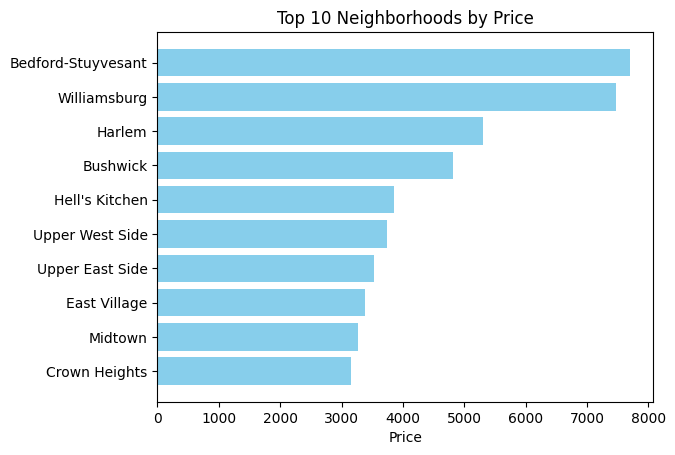

In [164]:
sorted_neighborhoods = sorted(neighborhoods, key=lambda x: x[1])

# Extracting prices for counting occurrences
top_10_neighborhoods = sorted_neighborhoods[-10:] 
neighborhood_names, prices = zip(*top_10_neighborhoods)

# Creating a horizontal bar graph
plt.barh(neighborhood_names, prices, color='skyblue')
plt.xlabel('Price')
plt.title('Top 10 Neighborhoods by Price')
plt.show()


In [165]:
cheapest_neighborhood = min(neighborhoods, key=lambda x: x[1])
print(f'The Cheapest neightboorhood is {cheapest_neighborhood}')

The Cheapest neightboorhood is ('Chelsea, Staten Island', 1)


In [166]:
short_term = []

for index, row in df.iterrows():
    if row['minimum nights'] <= 10:
        short_term.append({'neighborhood': row['neighbourhood'], 'count': 1})

# Calculate the count for each neighborhood
neighborhood_counts = {}
for room in short_term:
    neighborhood = room['neighborhood']
    if neighborhood in neighborhood_counts:
        neighborhood_counts[neighborhood] += 1
    else:
        neighborhood_counts[neighborhood] = 1

print(neighborhood_counts)



{'Kensington': 309, 'Harlem': 4485, 'East Harlem': 1909, 'Murray Hill': 478, "Hell's Kitchen": 2906, 'Upper West Side': 2775, 'Chinatown': 622, 'South Slope': 482, 'Williamsburg': 6457, 'Fort Greene': 751, 'Chelsea': 1738, 'Crown Heights': 2757, 'Park Slope': 819, 'Bedford-Stuyvesant': 6610, 'Windsor Terrace': 273, 'Inwood': 452, 'Greenpoint': 1755, 'Bushwick': 4127, 'Flatbush': 1103, 'Lower East Side': 1592, 'East Village': 2893, 'Prospect-Lefferts Gardens': 976, 'Long Island City': 968, 'Kips Bay': 588, 'Upper East Side': 2478, 'Clinton Hill': 924, 'Washington Heights': 1504, 'Brooklyn Heights': 255, 'Prospect Heights': 582, 'Carroll Gardens': 408, 'West Village': 1159, 'Flatlands': 198, 'Cobble Hill': 161, 'Flushing': 837, 'Boerum Hill': 275, 'Jamaica': 567, 'Ridgewood': 691, 'Middle Village': 56, 'Highbridge': 55, 'NoHo': 113, 'Ditmars Steinway': 594, 'Flatiron District': 129, 'Roosevelt Island': 131, 'SoHo': 569, 'Greenwich Village': 579, 'Little Italy': 178, 'East Flatbush': 975,

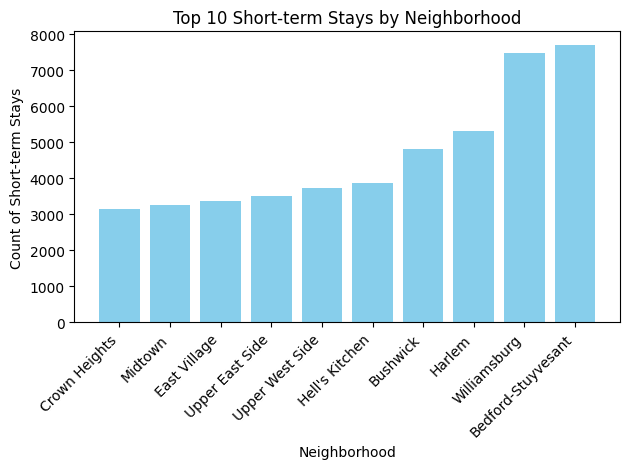

In [167]:
short_termstays = sorted_neighborhoods[-10:]

# Extracting data for plotting
neighborhoods = [item[0] for item in short_termstays]
counts = [item[1] for item in short_termstays]

# Creating a bar chart
plt.bar(neighborhoods, counts, color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Count of Short-term Stays')
plt.title('Top 10 Short-term Stays by Neighborhood')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

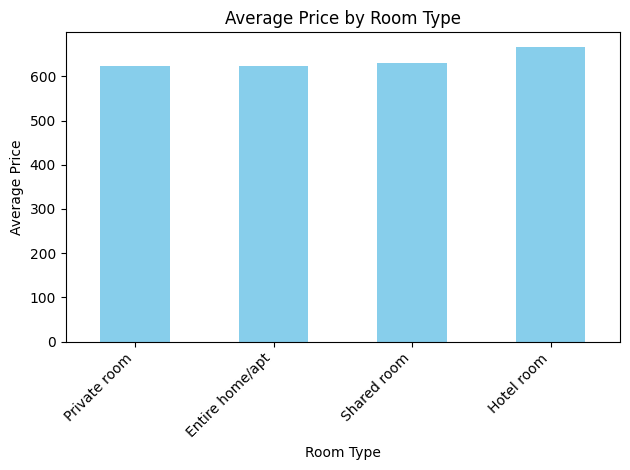

In [168]:
prices_by_room_type = stats.groupby('room_type')['price'].mean().sort_values(ascending=True)

# Creating a bar graph
prices_by_room_type.plot(kind='bar', color='skyblue')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

The averages are all similar between one another, the hotel room is on average slighlty more expensive than the rest. 

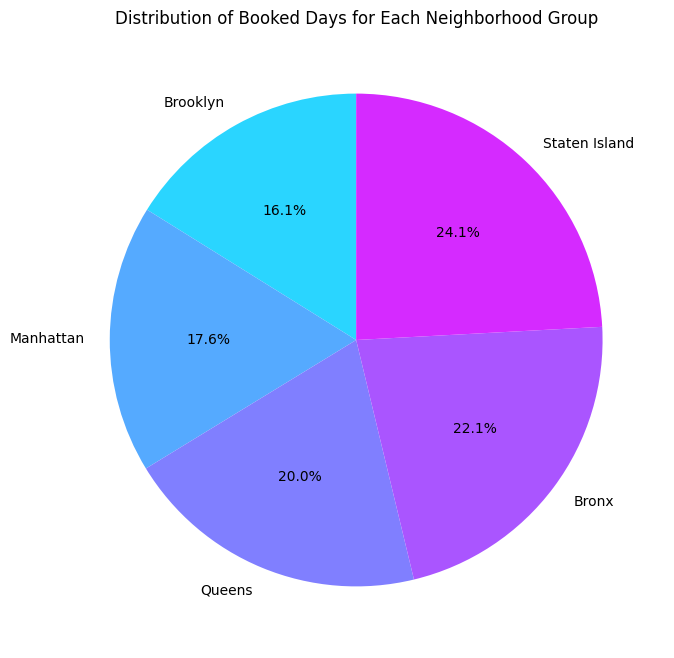

In [169]:
booked_days = stats.groupby('neighbourhood_group')['days_booked'].mean().sort_values(ascending=True)

color_palette = sns.color_palette("cool", n_colors=len(booked_days))
plt.figure(figsize=(8, 8))
plt.pie(booked_days, labels=booked_days.index, autopct='%1.1f%%', startangle=90, colors=color_palette)
plt.title('Distribution of Booked Days for Each Neighborhood Group')
plt.show()

## Task 5b: Data Visualization (Any Tool)

* Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences
* Using a line graph show in which year the maximum construction of rooms took place.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

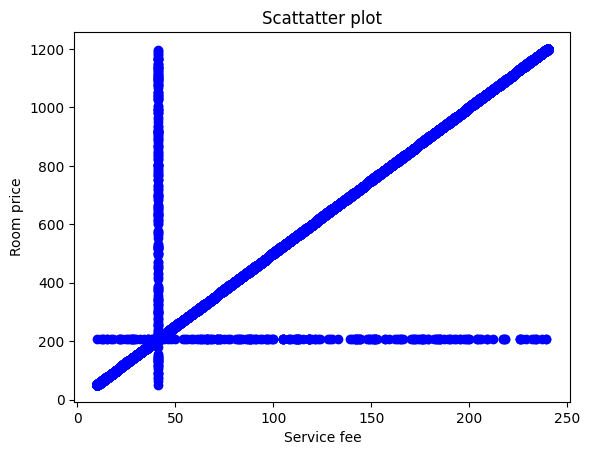

In [170]:
plt.scatter(stats.service_fee, stats.price, color='blue', label='Data points')

plt.xlabel('Service fee')
plt.ylabel('Room price')
plt.title('Scattatter plot')
plt.show()

There is a potential linear relationship between the two variables 

In [171]:
construction_years = stats['Construction_year']
counts = construction_years.value_counts().sort_index()

max_year = counts.idxmax()
max_count = counts.max()

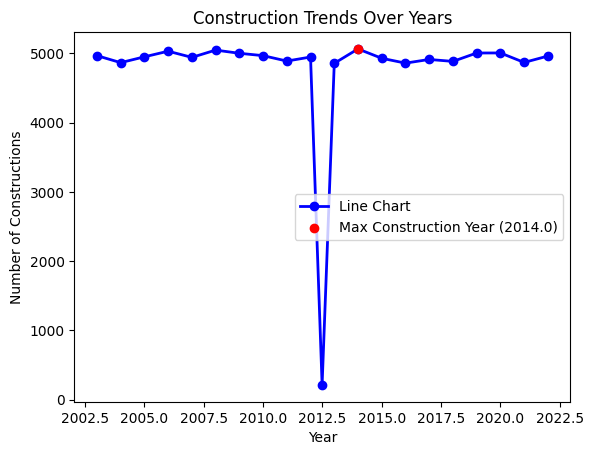

In [172]:
plt.plot(counts.index, counts.values, color='blue', linestyle='-', linewidth=2, marker='o', label='Line Chart')
plt.scatter(max_year, max_count, color='red', label=f'Max Construction Year ({max_year})', zorder=5)

plt.xlabel('Year')
plt.ylabel('Number of Constructions')
plt.title('Construction Trends Over Years')
plt.legend()
plt.show()

## Task 5c: Data Visualization (Any Tool)

* With the help of box plots illustrate the following
 * Effect of Review Rate number on price
 * Effect of host identity verified on price

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [173]:
stats['review_rate_number']=stats['review_rate_number'].round(2)

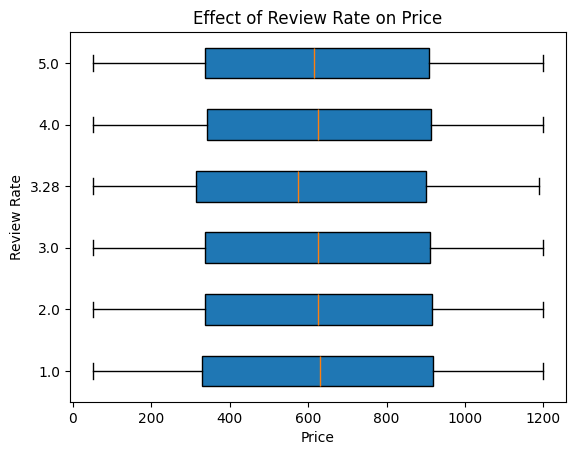

In [174]:

plt.boxplot([stats['price'][stats['review_rate_number'] == rate] for rate in sorted(stats['review_rate_number'].unique())],
            labels=sorted(stats['review_rate_number'].unique()), vert=False, patch_artist=True)
plt.xlabel('Price')
plt.ylabel('Review Rate')
plt.title('Effect of Review Rate on Price')

plt.show()

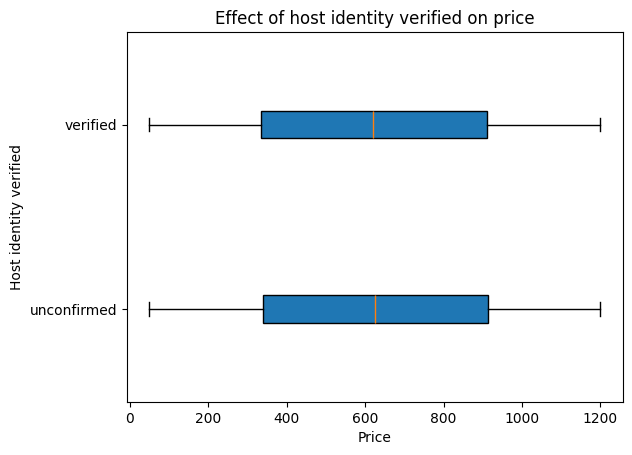

In [175]:

plt.boxplot([stats['price'][stats['host_identity_verified'] == rate] for rate in sorted(stats['host_identity_verified'].unique())],
            labels=sorted(stats['host_identity_verified'].unique()), vert=False, patch_artist=True)
plt.xlabel('Price')
plt.ylabel('Host identity verified')
plt.title('Effect of host identity verified on price')

plt.show()